In [25]:
library(tidyverse)
library(corrplot)   
library(scales)      
library(viridis)  
library(readr)
library(vegan)
library(ggplot2)

## Data cleaning

In [7]:
data_raw <- read.csv(
  "Predator_and_prey_body_sizes_in_marine_food_webs.csv",
  header = TRUE,
  sep = "\t",
  quote = "",
  check.names = TRUE,
  strip.white = TRUE,
  fileEncoding = "latin1"
)

cols_to_keep <- c("X.Record_number", "Individual_ID", "Predator",
                  "Predator._taxon", "Predator_lifestage",
                  "Type_of_feeding_interaction", "Standardised.predator.length",
                  "SI.predator.mass", "Diet.coverage",
                  "Prey", "Prey.taxon", "SI.prey.length", "SI.prey.mass",
                  "Geographic.location", "Latitude", "Longitude",
                  "Depth", "Mean.annual.temp", "SD.annual.temp",
                  "Mean.PP", "SD.PP", "Specific.habitat")

data_clean <- data_raw[, cols_to_keep, drop = FALSE]

head(data_clean)

,X.Record_number,Individual_ID,Predator,Predator._taxon,Predator_lifestage,Type_of_feeding_interaction,Standardised.predator.length,SI.predator.mass,Diet.coverage,Prey,⋯,SI.prey.mass,Geographic.location,Latitude,Longitude,Depth,Mean.annual.temp,SD.annual.temp,Mean.PP,SD.PP,Specific.habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,"""1",1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,⋯,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,"""2",2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,⋯,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,"""3",3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,⋯,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,"""4",4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,⋯,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,"""5",5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,⋯,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,"""6",6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,⋯,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


## Visualization

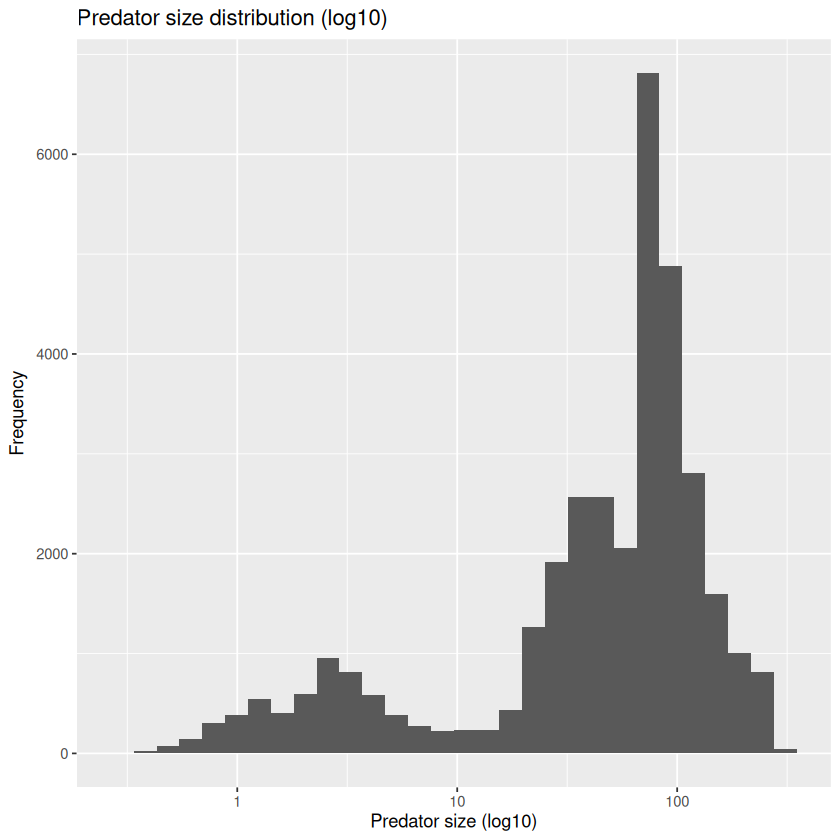

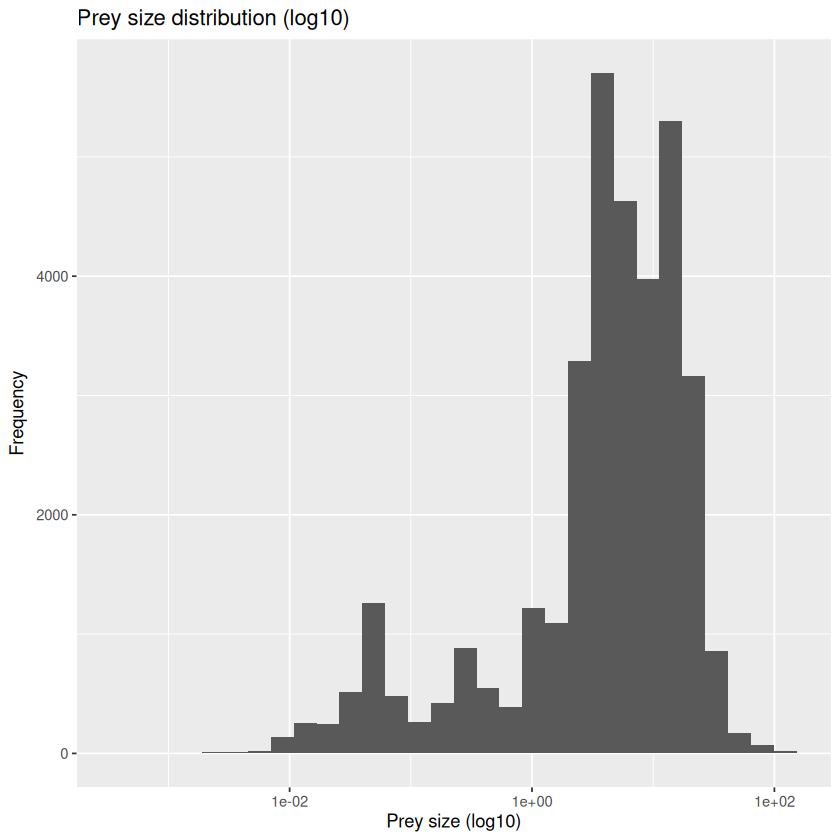

In [8]:
ggplot(data_clean, aes(x = Standardised.predator.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Predator size distribution (log10)",
       x = "Predator size (log10)", y = "Frequency")

ggplot(data_clean, aes(x = SI.prey.length)) +
  geom_histogram(bins = 30) +
  scale_x_log10() +
  labs(title = "Prey size distribution (log10)",
       x = "Prey size (log10)", y = "Frequency")

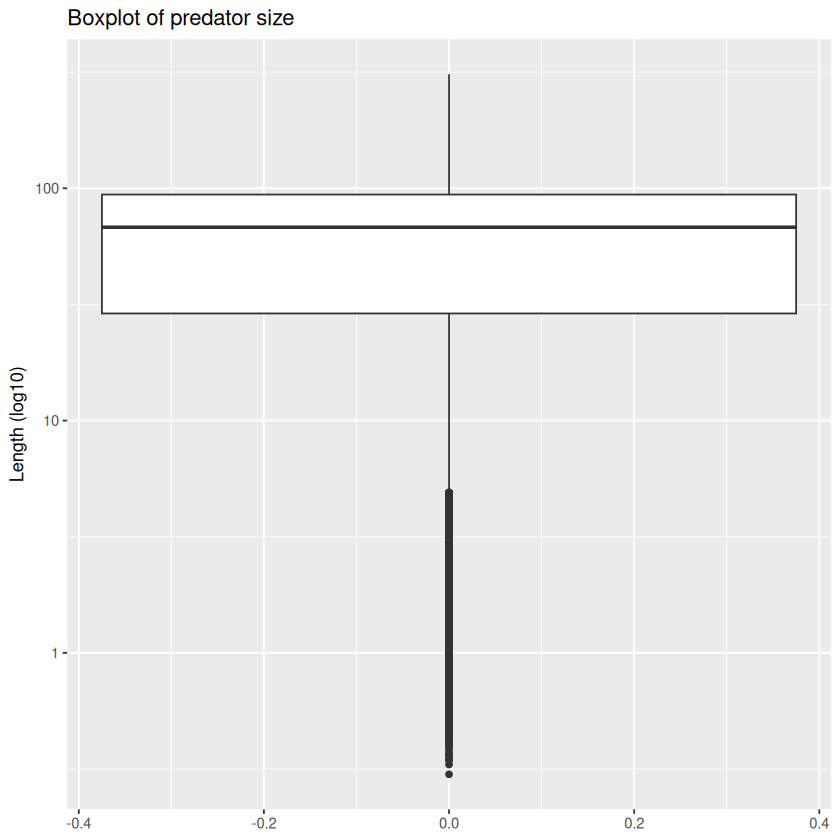

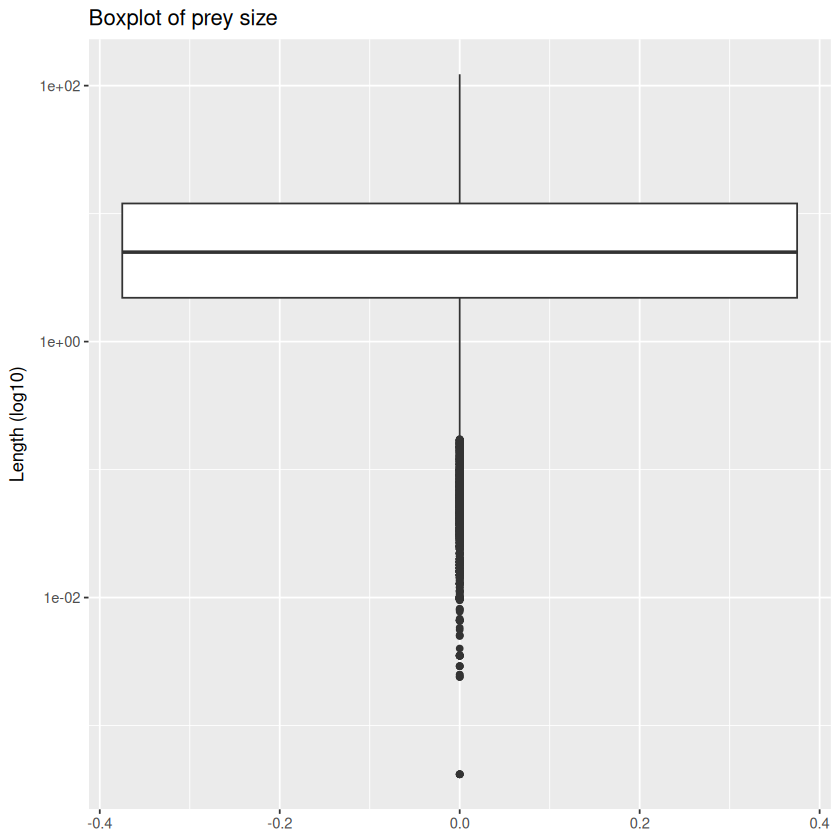

In [10]:
ggplot(data_clean, aes(y = Standardised.predator.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of predator size", y = "Length (log10)")

ggplot(data_clean, aes(y = SI.prey.length)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Boxplot of prey size", y = "Length (log10)")

`geom_smooth()` using formula = 'y ~ x'


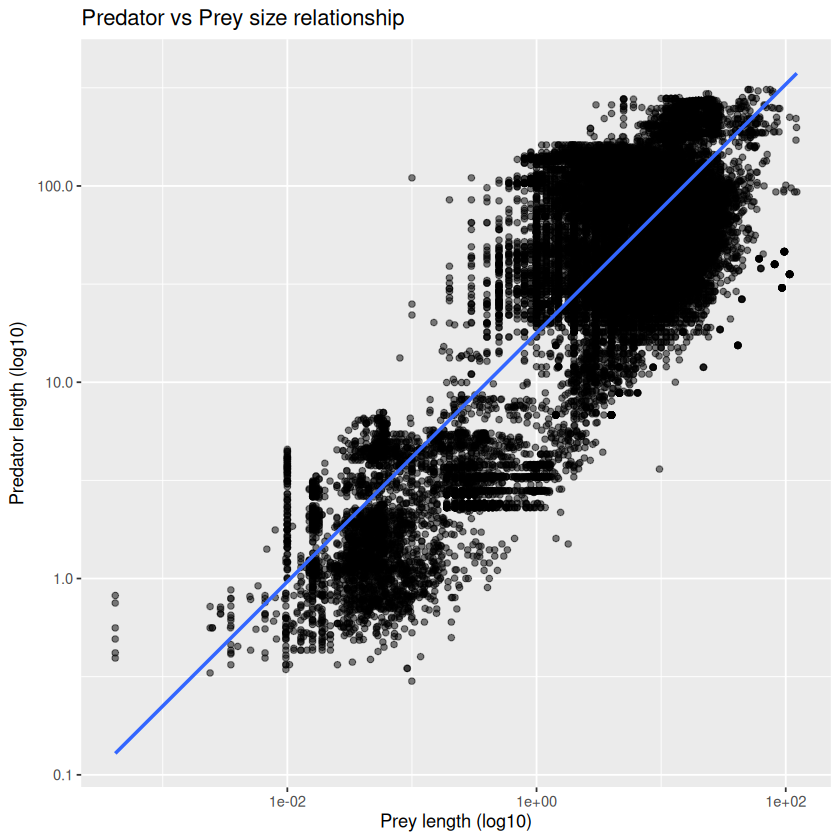

In [11]:
# Predator vs Prey size relationship
ggplot(data_clean, aes(x = SI.prey.length, y = Standardised.predator.length)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_x_log10() +
  scale_y_log10() +
  labs(title = "Predator vs Prey size relationship",
       x = "Prey length (log10)", y = "Predator length (log10)")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


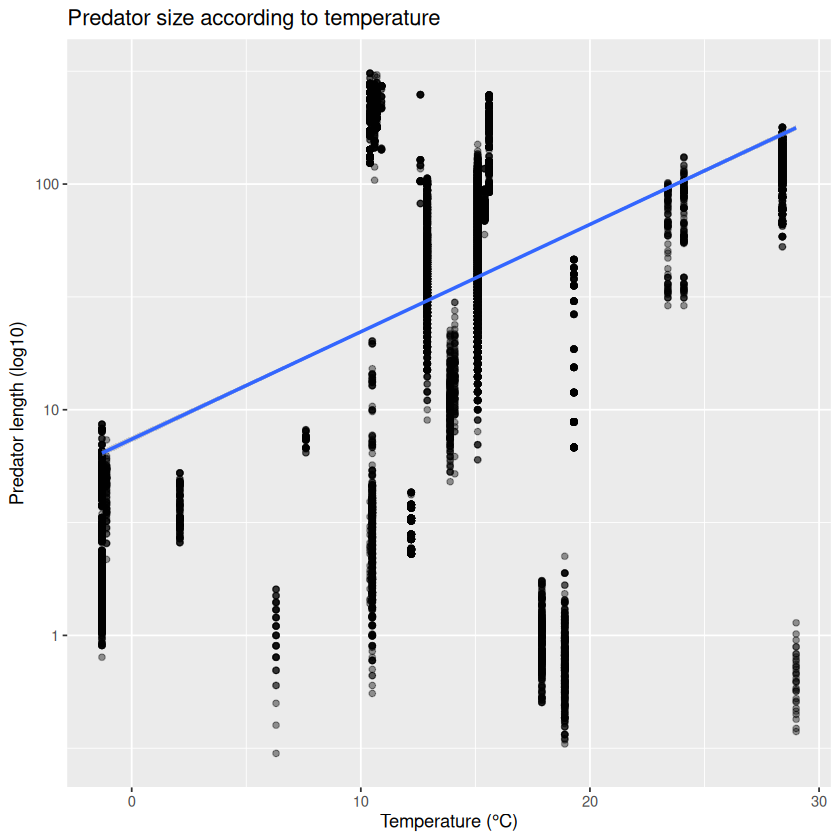

`geom_smooth()` using formula = 'y ~ x'


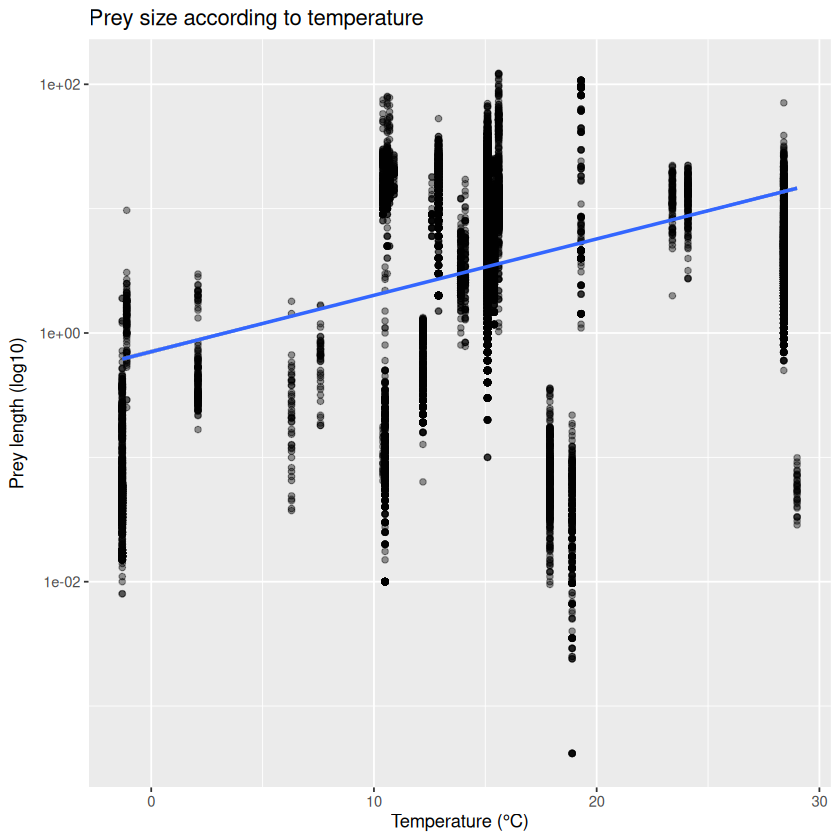

`geom_smooth()` using formula = 'y ~ x'


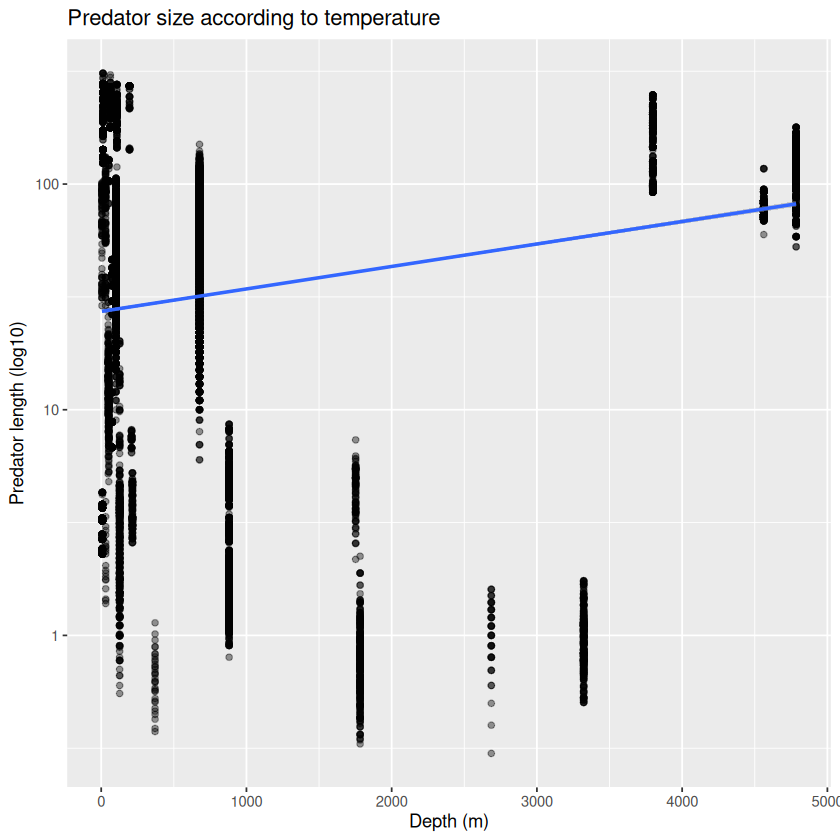

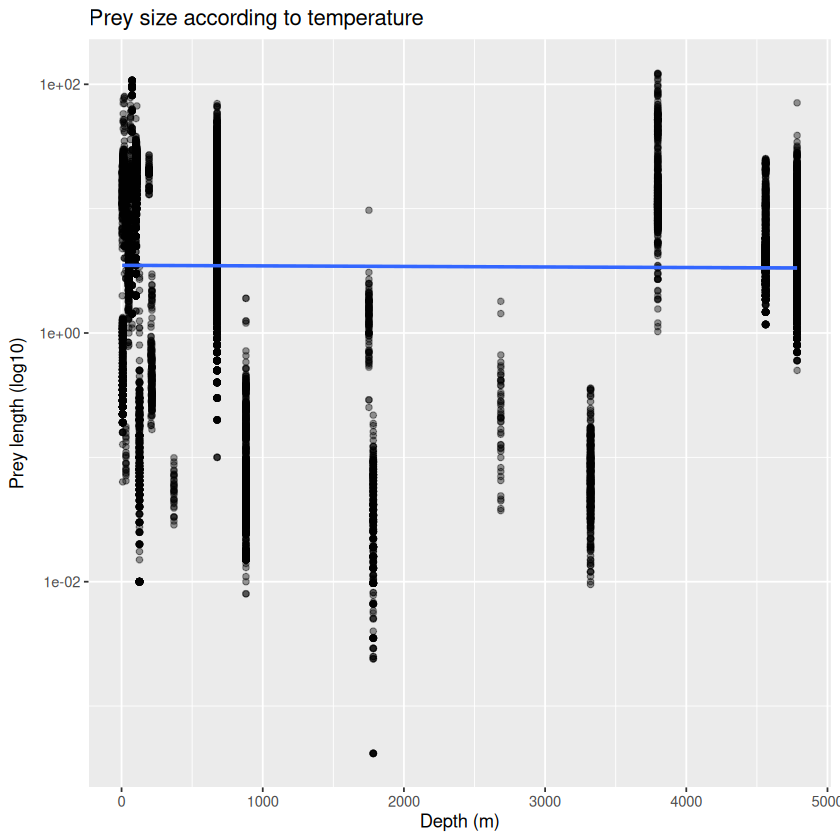

In [13]:
#Size vs environmental factor
ggplot(data_clean, aes(x = Mean.annual.temp, y = Standardised.predator.length)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm") +
  scale_y_log10() +
  labs(title = "Predator size according to temperature",
       x = "Temperature (°C)", y = "Predator length (log10)")

ggplot(data_clean, aes(x = Mean.annual.temp, y = SI.prey.length)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm") +
  scale_y_log10() +
  labs(title = "Prey size according to temperature",
       x = "Temperature (°C)", y = "Prey length (log10)")

ggplot(data_clean, aes(x = Depth, y = Standardised.predator.length)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm") +
  scale_y_log10() +
  labs(title = "Predator size according to temperature",
       x = "Depth (m)", y = "Predator length (log10)")

ggplot(data_clean, aes(x = Depth, y = SI.prey.length)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm") +
  scale_y_log10() +
  labs(title = "Prey size according to temperature",
       x = "Depth (m)", y = "Prey length (log10)")

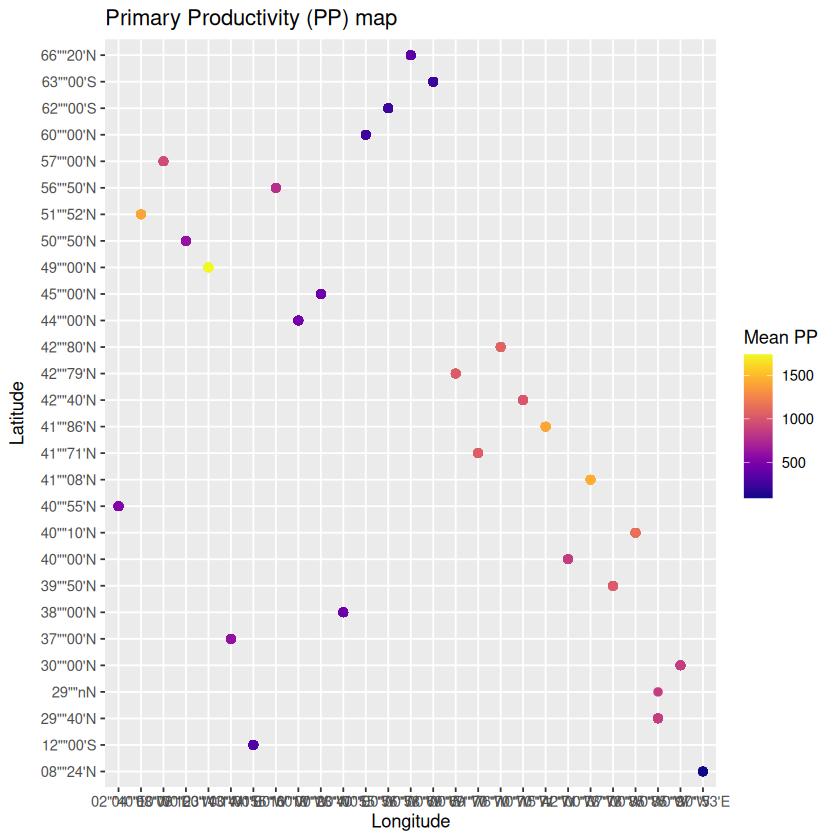

In [14]:
# PP vs location
ggplot(data_clean, aes(x = Longitude, y = Latitude, color = Mean.PP)) +
  geom_point(size = 2) +
  scale_color_viridis(option = "C") +
  labs(title = "Primary Productivity (PP) map",
       x = "Longitude", y = "Latitude", color = "Mean PP")

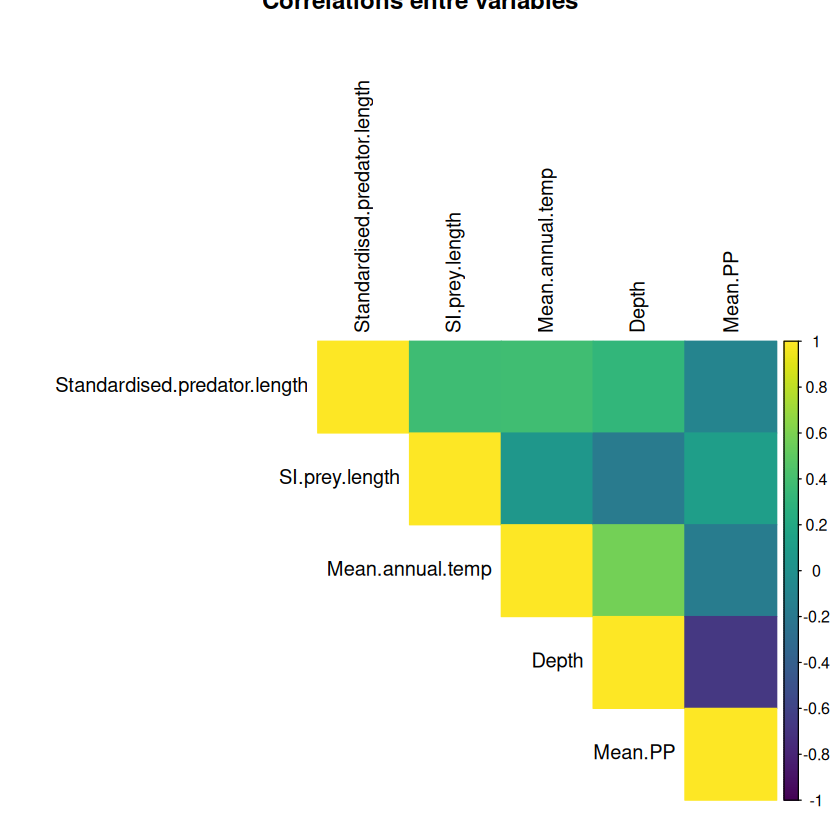

In [15]:
# Heatmap

num_vars <- data_clean %>%
  select(Standardised.predator.length, SI.prey.length, Mean.annual.temp, Depth, Mean.PP) %>%
  drop_na()
corr_matrix <- cor(num_vars, use = "complete.obs")   #correlation matrice
corrplot(corr_matrix, method = "color", type = "upper", tl.col = "black",        #heatmap
         col = viridis::viridis(200), title = "Corrélations entre variables")

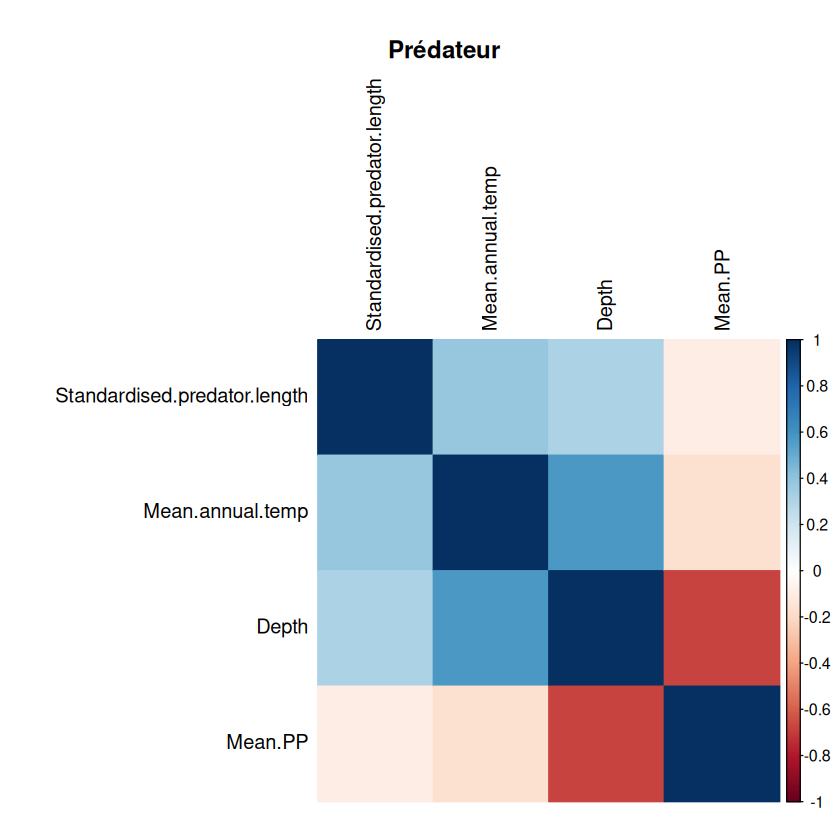

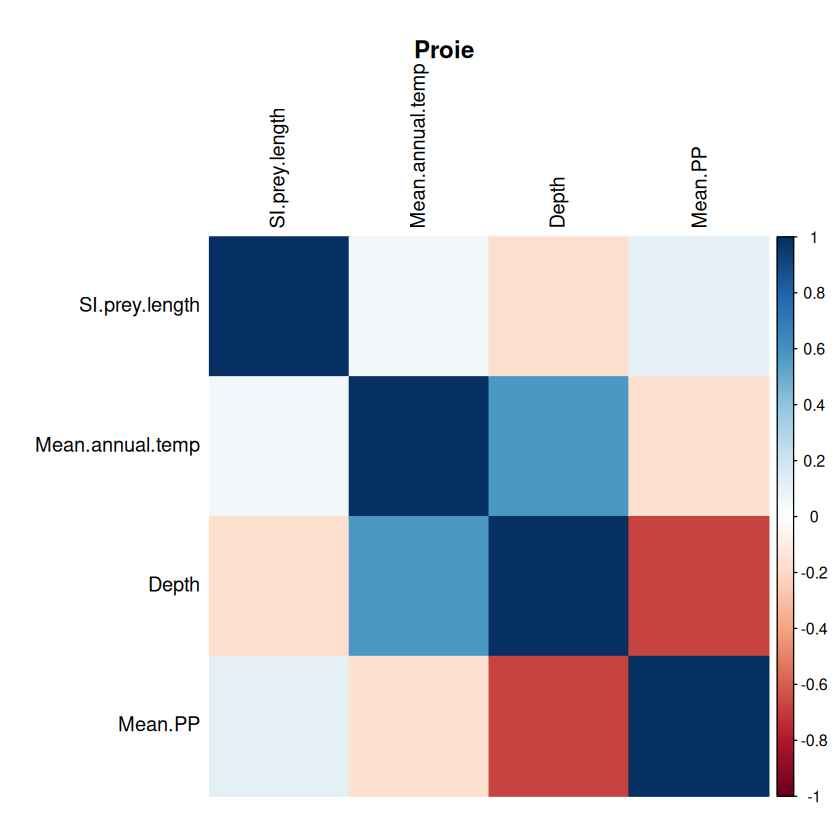

In [20]:
# Heatmap Predator vs Prey
corr_pred <- cor(data_clean %>%
                   select(Standardised.predator.length, Mean.annual.temp, Depth, Mean.PP),
                 use = "complete.obs")

corr_prey <- cor(data_clean %>%
                   select(SI.prey.length, Mean.annual.temp, Depth, Mean.PP),
                 use = "complete.obs")

corrplot(corr_pred, method = "color", tl.col = "black")
title("Prédateur")

corrplot(corr_prey, method = "color", tl.col = "black")
title("Proie")

## Visualization

In [26]:
df <- data_clean

In [27]:
df <- df %>%
  mutate(
    ratio_size = `Standardised.predator.length` / `SI.prey.length`,
    ratio_mass = `SI.predator.mass` / `SI.prey.mass`,
    log_ratio_size = log10(ratio_size + 1),
    log_ratio_mass = log10(ratio_mass + 1),
    log_SI_prey = log10(`SI.prey.length` + 1),
    log_PP = log10(`Mean.PP` + 1),
    log_depth = log10(Depth + 1)
  ) %>%
  filter(
    !is.na(Predator),
    !is.na(`Geographic.location`),
    !is.na(log_SI_prey),
    !is.na(log_ratio_size),
    !is.na(`Mean.annual.temp`)
  )

In [28]:
df_site <- df %>%
  group_by(Predator, `Geographic.location`) %>%
  summarise(
    Q10_prey = quantile(`SI.prey.length`, 0.10, na.rm=TRUE),
    Q50_prey = quantile(`SI.prey.length`, 0.50, na.rm=TRUE),
    Q90_prey = quantile(`SI.prey.length`, 0.90, na.rm=TRUE),
    Q50_ratio = quantile(ratio_size, 0.50, na.rm=TRUE),
    sd_ratio = sd(ratio_size, na.rm = TRUE),
    prey_div = diversity(table(Prey)),
    mean_temp = mean(`Mean.annual.temp`, na.rm=TRUE),
    mean_depth = mean(Depth, na.rm=TRUE),
    mean_PP = mean(`Mean.PP`, na.rm=TRUE),
    n = n()
  ) %>%
  filter(n >= 5) %>%   
  ungroup()

`summarise()` has grouped output by 'Predator'. You can override using the
`.groups` argument.


In [29]:
traits <- df_site %>%
  select(Q10_prey, Q50_prey, Q90_prey, Q50_ratio, sd_ratio, prey_div)

traits_scaled <- scale(traits)

In [30]:
# PCA 1: espèce x sites

pca <- prcomp(traits_scaled, center = FALSE, scale = FALSE)

scores <- df_site %>%
  mutate(
    PC1 = pca$x[,1],
    PC2 = pca$x[,2]
  )

loadings <- as.data.frame(pca$rotation)
loadings$Variable <- rownames(loadings)

loadings$PC1 <- loadings$PC1 * 3
loadings$PC2 <- loadings$PC2 * 3

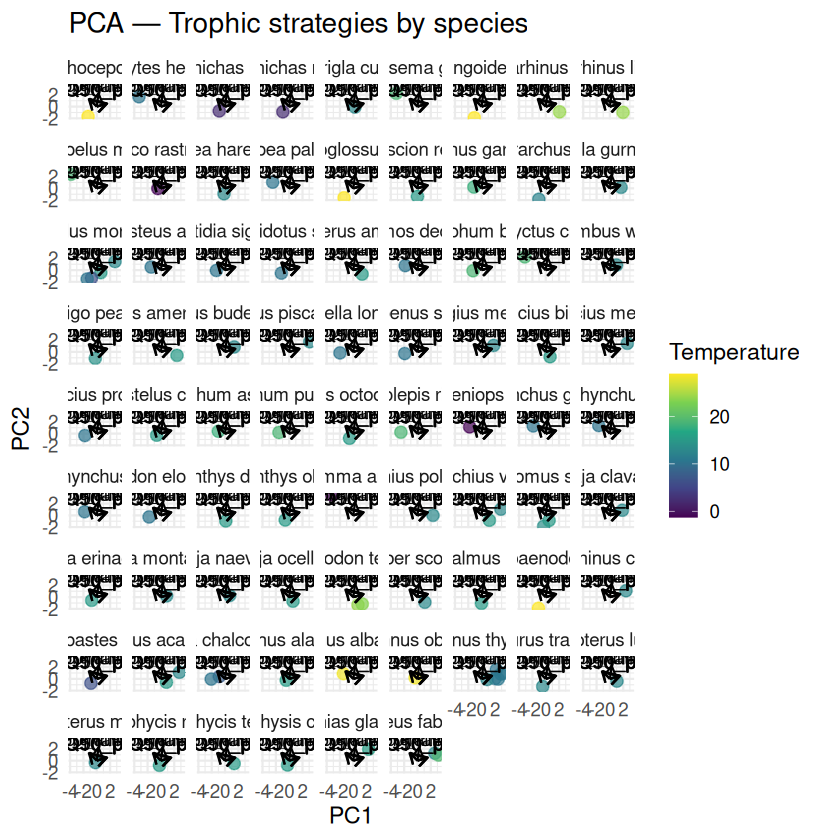

In [32]:
ggplot() +
  # Points
  geom_point(data = scores,
             aes(PC1, PC2, color = mean_temp),
             size = 3, alpha = 0.7) +
  scale_color_viridis_c() +
  
  # Arrows
  geom_segment(data = loadings,
               aes(x = 0, y = 0,
                   xend = PC1, yend = PC2),
               arrow = arrow(length = unit(0.25, "cm")),
               color = "black") +
  
  geom_text(data = loadings,
            aes(x = PC1, y = PC2, label = Variable),
            size = 4, vjust = -0.5) +
  
  facet_wrap(~ Predator) +
  theme_minimal(base_size = 14) +
  labs(title = "PCA — Trophic strategies by species",
       color = "Temperature")

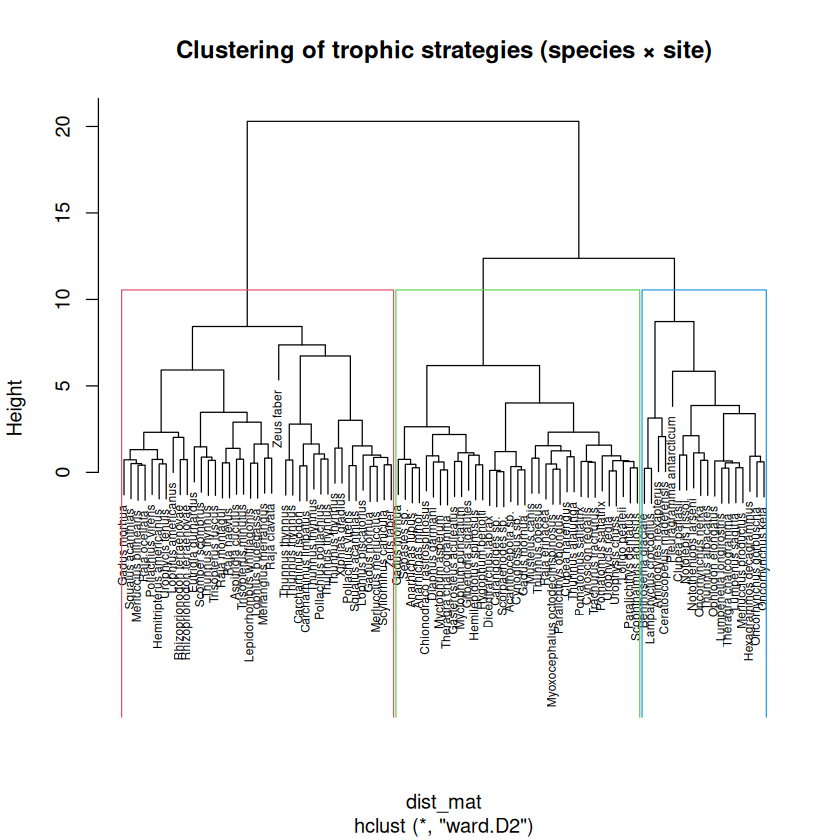

In [34]:
#Cluster by euclidian distance

row_names <- paste(df_site$Predator, df_site$`Geographic.location`, sep = "_")

pca <- prcomp(traits_scaled)
scores <- as.data.frame(pca$x)
scores$Predator <- df_site$Predator
scores$Location <- df_site$`Geographic.location`
scores$label <- row_names
scores$Temp <- df_site$mean_temp

dist_mat <- dist(traits_scaled, method = "euclidean")

cluster_h <- hclust(dist_mat, method = "ward.D2")

k <- 3
scores$cluster <- cutree(cluster_h, k = k)

plot(cluster_h, labels = df_site$Predator,
     main = "Clustering of trophic strategies (species × site)",
     cex = 0.6)
rect.hclust(cluster_h, k = k, border = 2:6)